Implantez une fonction recevant une liste de couples (xi,yi) ainsi qu'une liste d'abscisses αi et qui renvoie la liste des valeurs P(αi), P étant le polynôme d'interpolation construit sur les points (xi,yi)
.
Implantez cette même fonction par le biais de la méthode barycentrique et comparez les deux méthodes en termes de vitesses d'exécution avec des listes αi
conséquentes.
Implantez le calcul de P(α)
par l'algorithme de Neville-Atiken. Comparez sur quelques exemples la vitesse de convergence jusqu'à une certaine précision dans les cas suivants :

    Les (xi,yi)

sont intégrés au calcul dans un ordre aléatoire (éventuellement celui fourni par l'utilisateur)
Les (xi,yi)
sont intégrés au calcul dans l'ordre de la distance décroissante entre xi et α
.
Les (xi,yi)
sont intégrés au calcul dans l'ordre de la distance croissante entre xi et α.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def interple(points,absci):
     x=np.array([i[0] for i in points])
     y=np.array([i[1] for i in points])
     L_i=np.array([[np.prod([(p-j[0])/(i[0]-j[0]) for k,j in enumerate(points) if j[0]!=i[0]]) for k,i in enumerate(points)] for p in absci ])
     return (L_i*y).sum(axis=1)

In [4]:
interple([(-1,0),(0,0),(1,2)],[-0.5,2,3])

array([-0.25,  6.  , 12.  ])

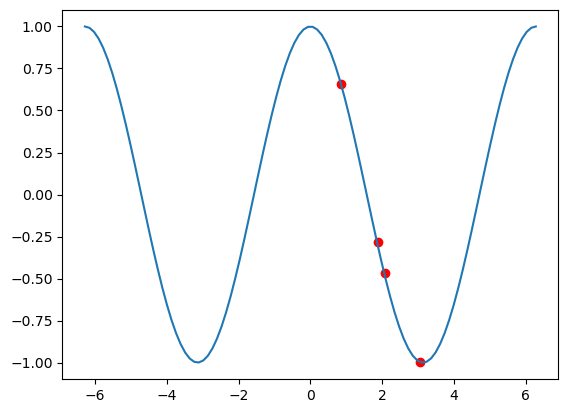

In [5]:
x=np.linspace(-2*np.pi,2*np.pi,100)
plt.Figure(figsize=(12,8))
plt.plot(x,np.cos(x))
x=np.random.rand(4)*2*np.pi
y=interple([(np.pi,-1),(0,1),(np.pi/4,np.sqrt(2)/2),(np.pi/3,0.5)],x)
plt.scatter(x,y,color='red')
plt.show()

In [6]:
def barycentre(points,absci):
      res=[]
      A_i=[np.prod([1/(i[0]-j[0]) for k,j in enumerate(points) if i[0]!=j[0]]) for r,i in enumerate(points) ]
      for p in absci:
         res.append(sum([j[1]*A_i[i]/(p-j[0]) for i,j in enumerate(points)])/sum([A_i[i]/(p-j[0]) for i,j in  enumerate(points)]))  
      return res

In [7]:
barycentre([(-1,0),(0,0),(1,2)],[-0.5,2,3])

[-0.25, 6.000000000000002, 11.999999999999995]

In [16]:
%%timeit
ai=np.arange(1.5,10000,0.1)

75.8 µs ± 4.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
import time
start_time = time.time()
## ligne de code pour réaliser la rotation avec l'interpolation choisie
interple([(-1,0),(0,0),(1,2)],ai)
print("--- %s seconds ---" % (time.time() - start_time))

--- 13.36041259765625 seconds ---


In [10]:
import time
start_time = time.time()
## ligne de code pour réaliser la rotation avec l'interpolation choisie
s2=barycentre([(-1,0),(0,0),(1,2)],ai)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.5769462585449219 seconds ---


# La methode barycentrique est plus rapide

In [ ]:
def methode_Aiken(points abscisse):
    pass